In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical analysis
from scipy.stats import pearsonr, spearmanr

# For interactive plots (optional)
%matplotlib inline

# Settings
import warnings
warnings.filterwarnings('ignore')

# Increase plot resolution
plt.rcParams['figure.dpi'] = 100


In [3]:

# Define file paths
daily_file = '/trading_robot/src/Analysis/ModelPerformance/signal_return_DailyOhlcPreprocessing.csv'
# hourly_file = 'signal_return_HourOhlcPreprocessing.csv'
minute_file = '/trading_robot/src/Analysis/ModelPerformance/signal_return_MinuteOhlcPreprocessing.csv'

# Load data into DataFrames
daily_data = pd.read_csv(daily_file, parse_dates=['Date'])
# hourly_data = pd.read_csv(hourly_file, parse_dates=['Date'])
minute_data = pd.read_csv(minute_file, parse_dates=['Date'])

# Add a 'Frequency' column for identification
daily_data['Frequency'] = 'Daily'
# hourly_data['Frequency'] = 'Hourly'
minute_data['Frequency'] = '15-Minute'

# Combine all data into one DataFrame (optional)
all_data = pd.concat([daily_data, minute_data], ignore_index=True)
all_data

,Ticker,Date,Adjusted_Signal,Future_Return_1,Future_Return_2,Future_Return_5,Future_Return_8,Future_Return_10,signal_OHLC_raw_signal,signal_OHLC_adjusted_signal,...,signal_Volume_raw_signal,signal_Volume_adjusted_signal,signal_Volume_raw_signal_cv,risk_OHLC_entropy,risk_OHLC_directional_entropy,risk_OHLC_entropy_cv,risk_Volume_entropy,risk_Volume_directional_entropy,risk_Volume_entropy_cv,Frequency
0,AHHpA,2024-01-02 05:00:00,0.091918,0.009660,0.005880,0.008400,0.014700,0.002100,0.180470,0.091918,...,0.264297,0.132554,0.124698,0.746213,0.989827,0.111489,0.927397,0.997158,0.060927,Daily
1,AHHpA,2024-01-03 05:00:00,0.121710,-0.003744,-0.007488,-0.001248,-0.003744,0.005483,0.242923,0.121710,...,0.811678,0.524446,0.032003,0.893216,0.994776,0.027286,0.897045,0.709331,0.019232,Daily
2,AHHpA,2024-01-04 05:00:00,0.171642,-0.003758,0.002505,0.002923,-0.003758,0.009261,0.333084,0.171642,...,0.802520,0.512188,0.042555,0.897222,0.980211,0.019907,0.904045,0.725753,0.026979,Daily
3,AHHpA,2024-01-05 05:00:00,0.018137,0.006287,0.006287,0.012573,0.013068,0.013068,0.047758,0.018137,...,0.706721,0.410874,0.051306,0.862695,0.959545,0.052338,0.946150,0.839583,0.018335,Daily
4,AHHpA,2024-01-08 05:00:00,0.046860,0.000416,0.006247,0.006739,0.006739,-0.000416,0.093895,0.046860,...,0.457212,0.238323,0.189153,0.855746,0.984631,0.068504,0.949298,0.965139,0.051098,Daily
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100551,ABBV,2024-03-04 15:15:00,0.180817,-0.003651,-0.007851,NaN,NaN,NaN,0.361454,0.180817,...,0.399137,0.199891,0.029490,0.998761,0.999502,0.000526,0.998914,0.998409,0.000321,15-Minute
100552,ABBV,2024-03-04 15:30:00,0.180894,-0.004215,-0.001539,NaN,NaN,NaN,0.361610,0.180894,...,0.399176,0.199911,0.029109,0.998766,0.999509,0.000525,0.998915,0.998406,0.000319,15-Minute
100553,ABBV,2024-03-04 15:45:00,0.180918,0.002688,0.001873,NaN,NaN,NaN,0.361658,0.180918,...,0.399017,0.199829,0.028753,0.998766,0.999507,0.000526,0.998914,0.998418,0.000317,15-Minute
100554,ABBV,2024-03-04 16:00:00,0.180775,-0.000813,NaN,NaN,NaN,NaN,0.361376,0.180775,...,0.399268,0.199958,0.028908,0.998777,0.999514,0.000505,0.998915,0.998402,0.000321,15-Minute


In [19]:
print(daily_data.shape)
daily_data.columns

(50099, 21)


Index(['Ticker', 'Date', 'Adjusted_Signal', 'Future_Return_1',
       'Future_Return_2', 'Future_Return_5', 'Future_Return_8',
       'Future_Return_10', 'signal_OHLC_raw_signal',
       'signal_OHLC_adjusted_signal', 'signal_OHLC_raw_signal_cv',
       'signal_Volume_raw_signal', 'signal_Volume_adjusted_signal',
       'signal_Volume_raw_signal_cv', 'risk_OHLC_entropy',
       'risk_OHLC_directional_entropy', 'risk_OHLC_entropy_cv',
       'risk_Volume_entropy', 'risk_Volume_directional_entropy',
       'risk_Volume_entropy_cv', 'Frequency'],
      dtype='object')

In [ ]:
minute_data.shape

(50457, 21)

Processing Daily frequency...
Processing 15-Minute frequency...

Combined Distribution Summary:


,Adjusted_Signal_Range,Count,Percentage,Average_Future_Return_1,Average_Future_Return_2,Average_Future_Return_5,Average_Future_Return_8,Average_Future_Return_10,Frequency
0,-1.0 to -0.95,0,0.0,NaN,NaN,NaN,NaN,NaN,Daily
1,-0.95 to -0.90,0,0.0,NaN,NaN,NaN,NaN,NaN,Daily
2,-0.90 to -0.85,0,0.0,NaN,NaN,NaN,NaN,NaN,Daily
3,-0.85 to -0.80,0,0.0,NaN,NaN,NaN,NaN,NaN,Daily
4,-0.80 to -0.75,0,0.0,NaN,NaN,NaN,NaN,NaN,Daily
...,...,...,...,...,...,...,...,...,...
75,0.75 to 0.80,0,0.0,NaN,NaN,NaN,NaN,NaN,15-Minute
76,0.80 to 0.85,0,0.0,NaN,NaN,NaN,NaN,NaN,15-Minute
77,0.85 to 0.90,0,0.0,NaN,NaN,NaN,NaN,NaN,15-Minute
78,0.90 to 0.95,0,0.0,NaN,NaN,NaN,NaN,NaN,15-Minute


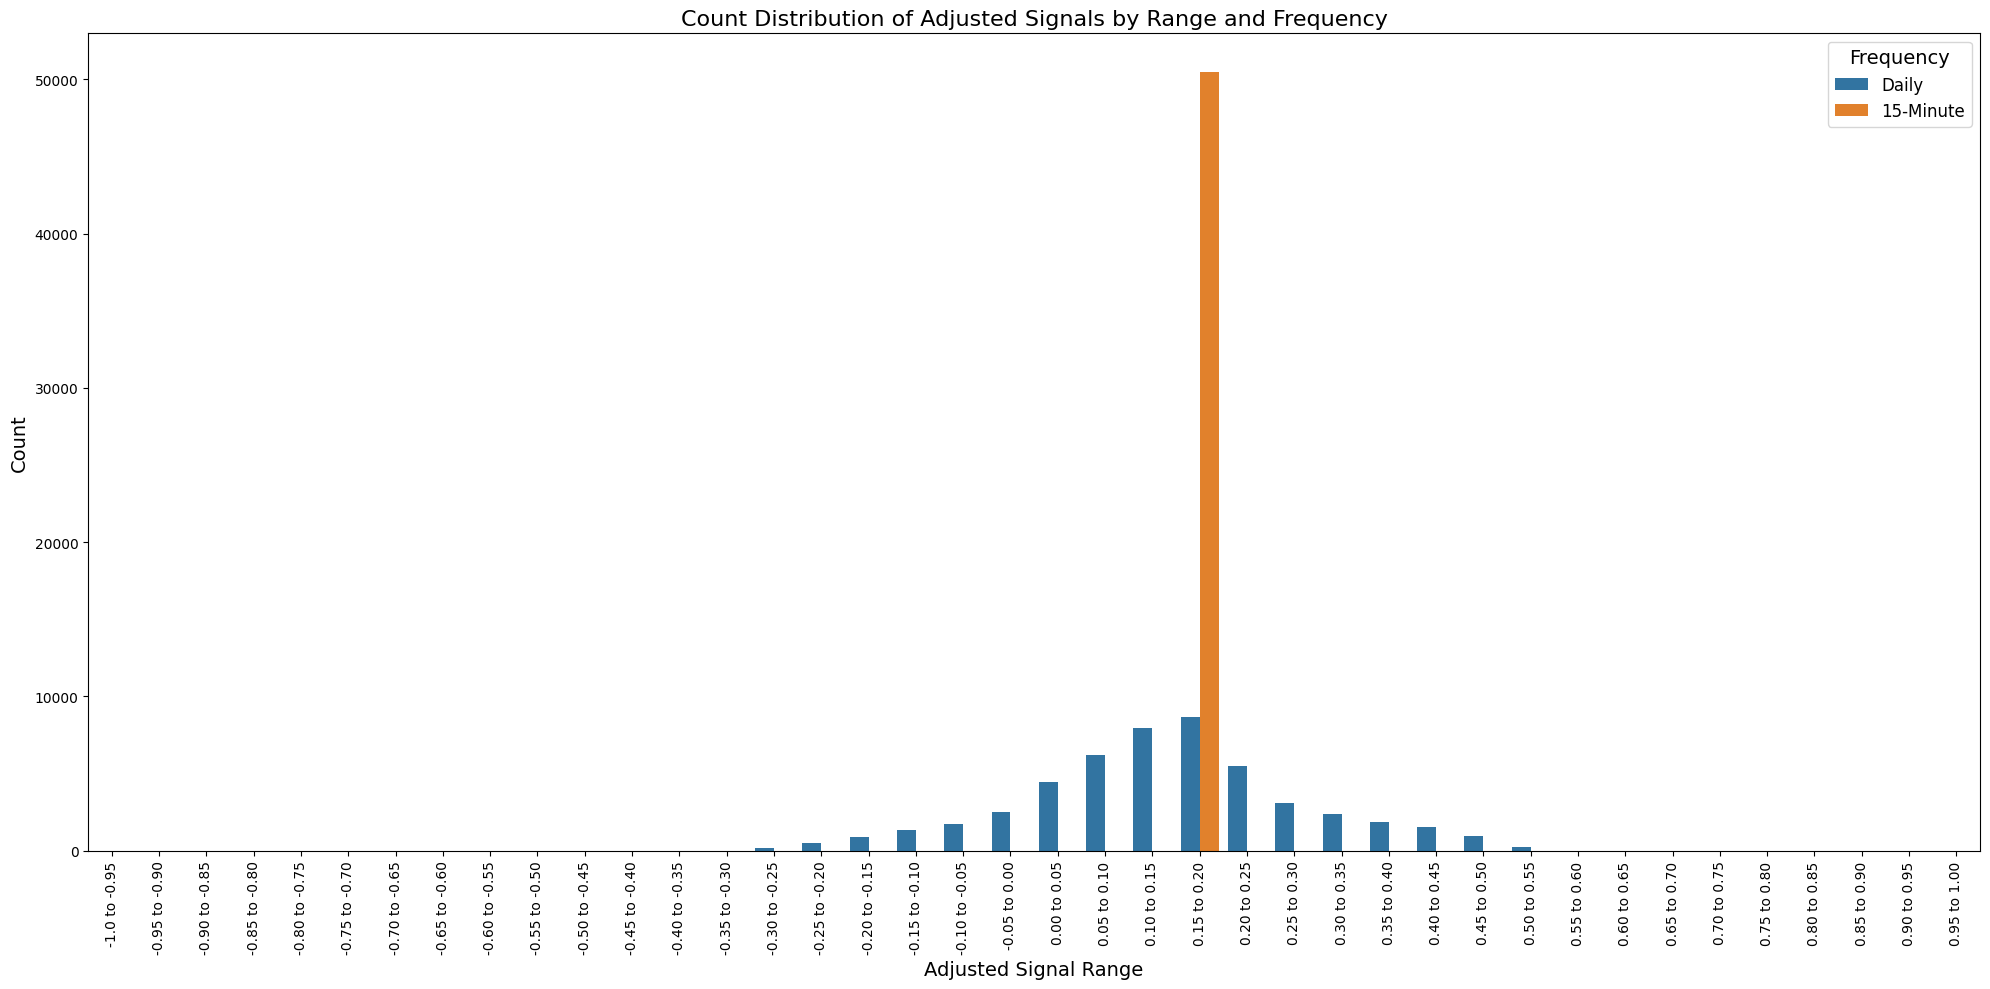

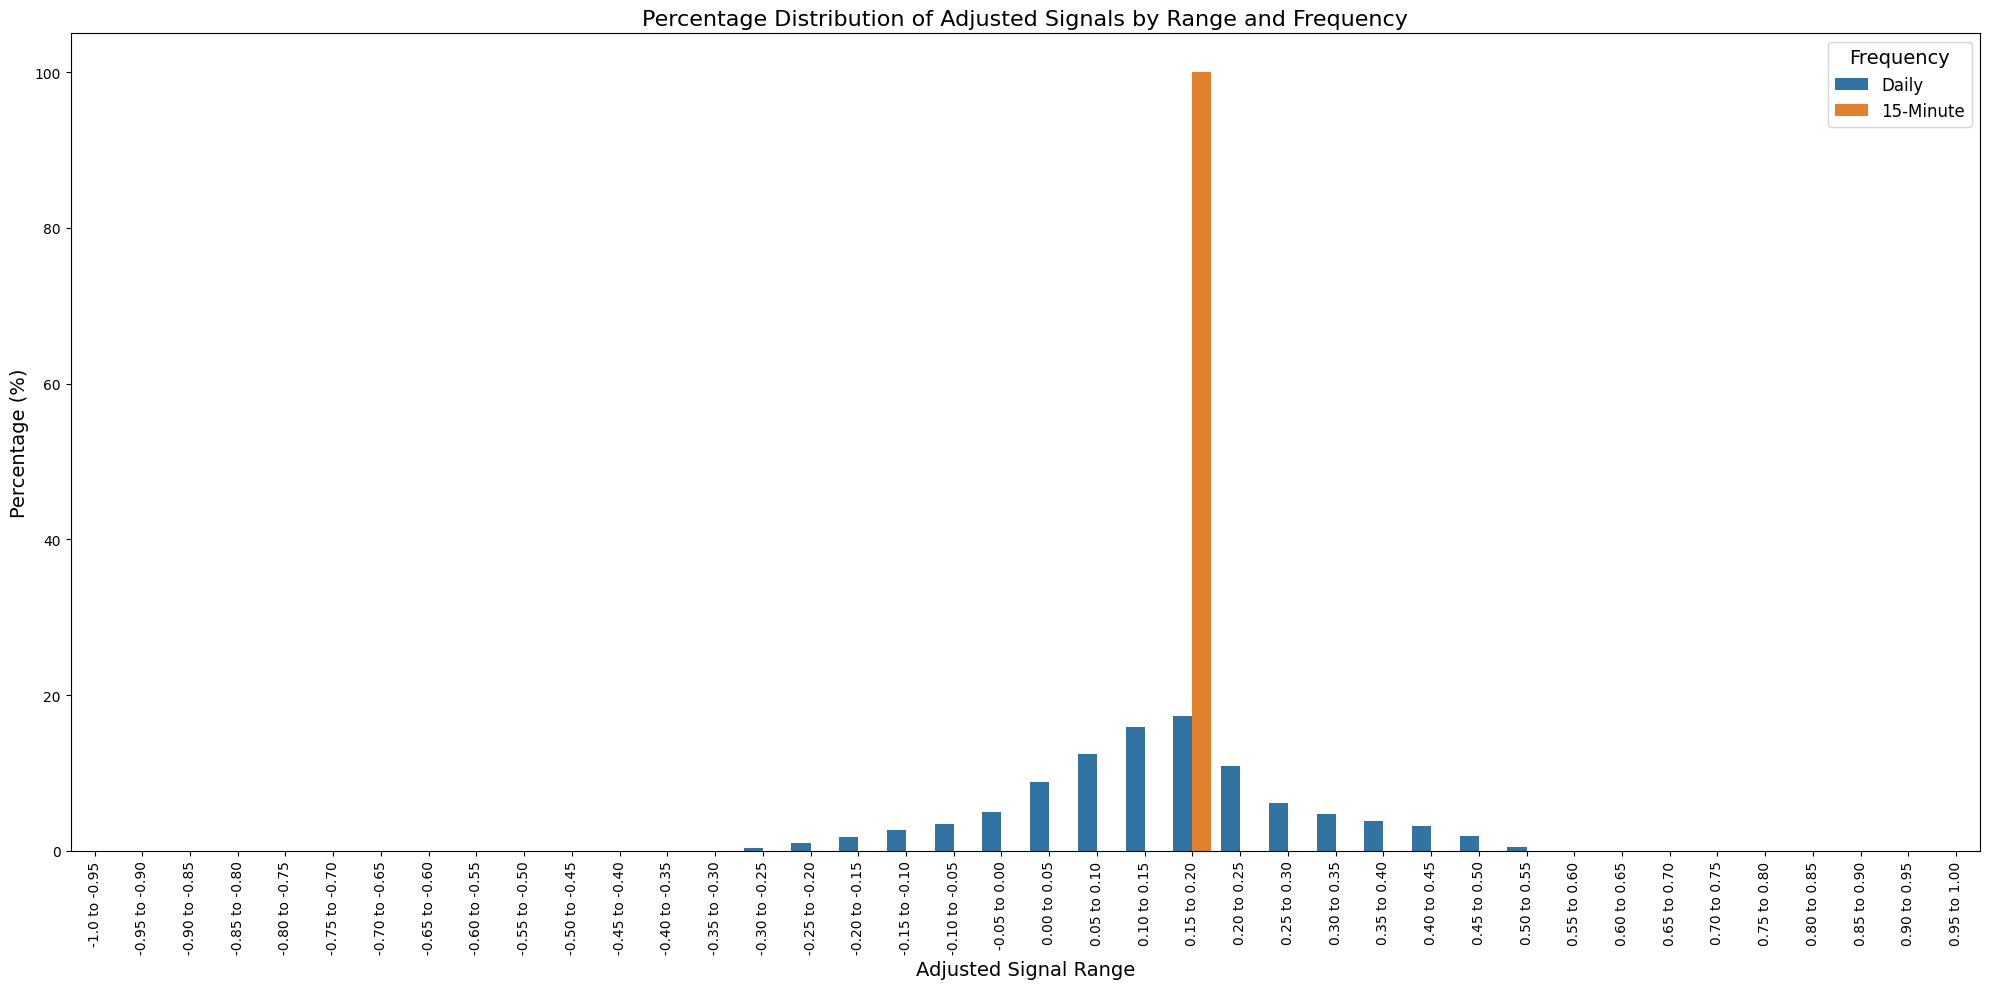

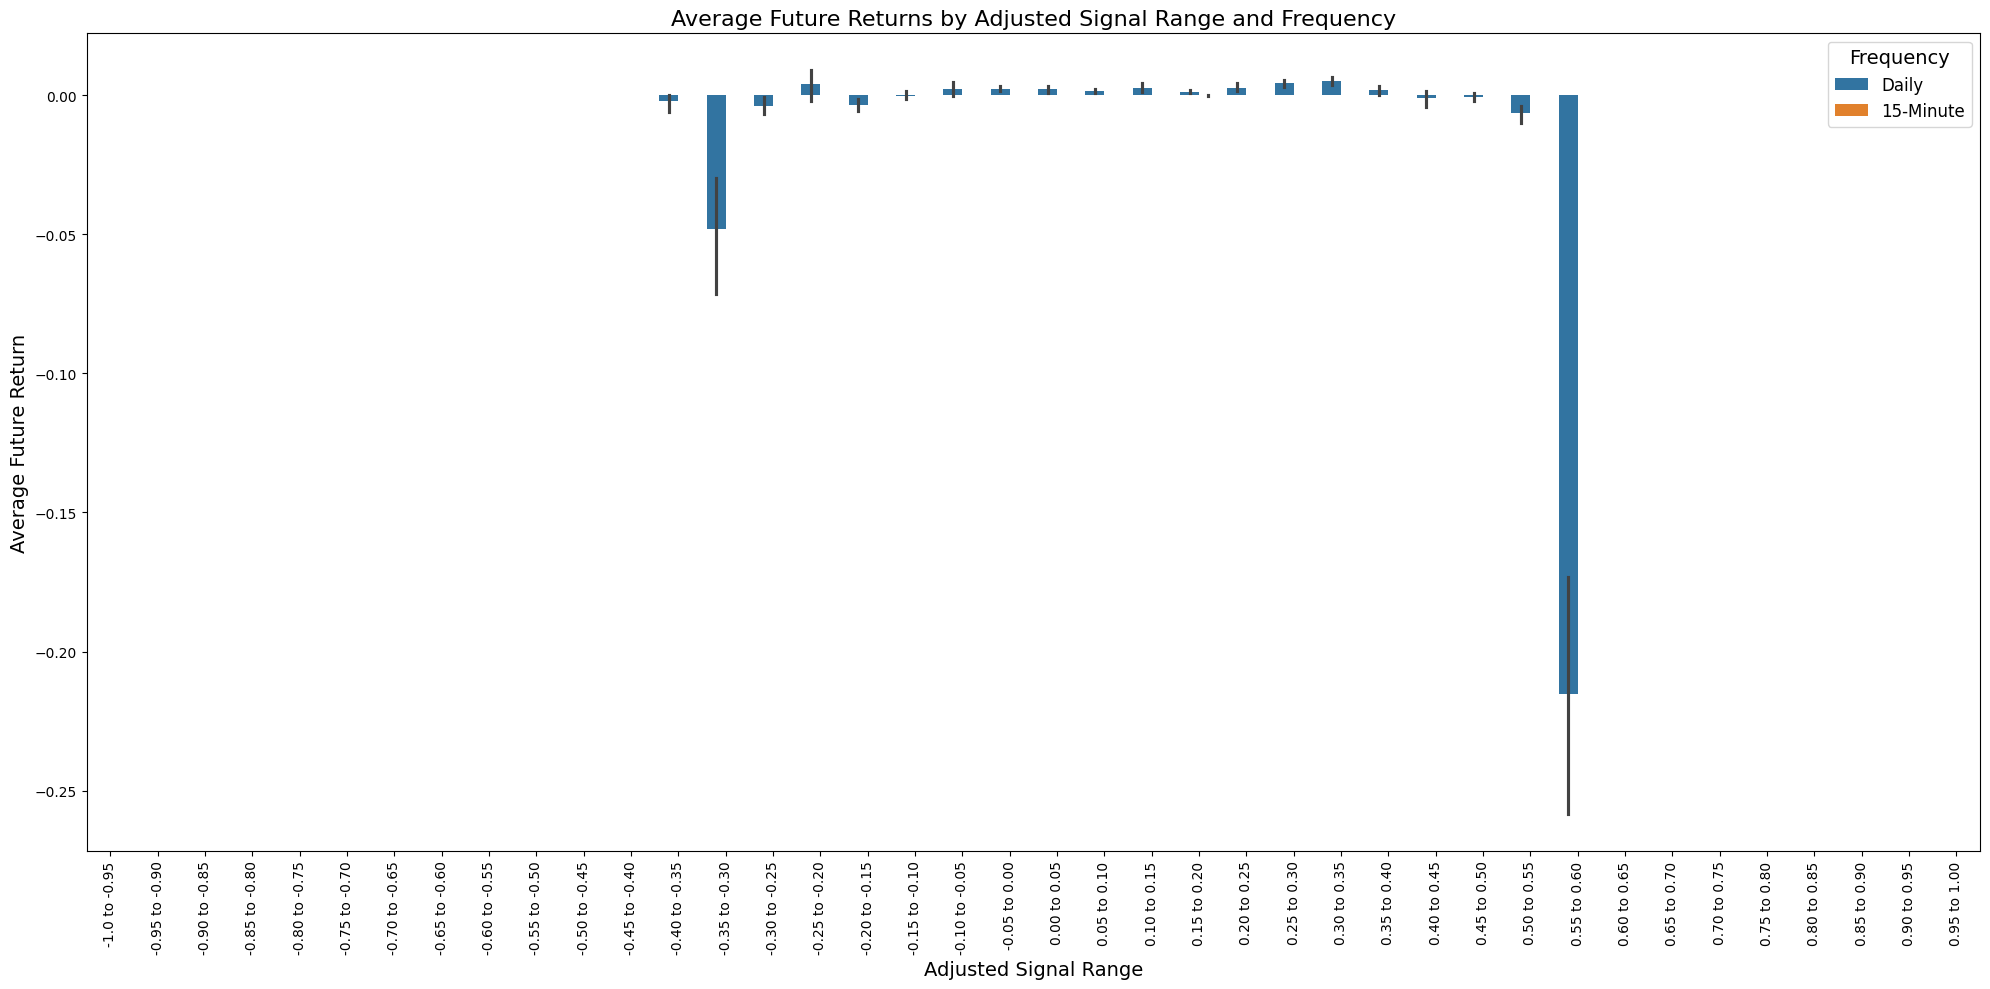


Detailed Distribution Summary with Average Future Returns:


,Adjusted_Signal_Range,Count,Percentage,Average_Future_Return_1,Average_Future_Return_2,Average_Future_Return_5,Average_Future_Return_8,Average_Future_Return_10,Frequency
0,-1.0 to -0.95,0,0.0,NaN,NaN,NaN,NaN,NaN,Daily
1,-0.95 to -0.90,0,0.0,NaN,NaN,NaN,NaN,NaN,Daily
2,-0.90 to -0.85,0,0.0,NaN,NaN,NaN,NaN,NaN,Daily
3,-0.85 to -0.80,0,0.0,NaN,NaN,NaN,NaN,NaN,Daily
4,-0.80 to -0.75,0,0.0,NaN,NaN,NaN,NaN,NaN,Daily
...,...,...,...,...,...,...,...,...,...
75,0.75 to 0.80,0,0.0,NaN,NaN,NaN,NaN,NaN,15-Minute
76,0.80 to 0.85,0,0.0,NaN,NaN,NaN,NaN,NaN,15-Minute
77,0.85 to 0.90,0,0.0,NaN,NaN,NaN,NaN,NaN,15-Minute
78,0.90 to 0.95,0,0.0,NaN,NaN,NaN,NaN,NaN,15-Minute



Combined distribution summary saved to 'adjusted_signal_distribution_summary.csv'.


In [27]:
# Model_Performance_Distribution_Analysis.ipynb

# 1. Introduction
# ----------------
# This notebook analyzes the distribution of the `Adjusted_Signal` from your machine learning models
# across predefined ranges. It calculates the count, percentage, and average future returns for each bin.
# The analysis is performed for Daily and 15-Minute frequencies.

# 2. Import Necessary Libraries
# -----------------------------

# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical analysis
from scipy.stats import pearsonr, spearmanr

# Settings
import warnings
warnings.filterwarnings("ignore")

# For interactive plots (optional)
%matplotlib inline

# 3. Load Data
# ------------

# Define file paths
daily_file = '/trading_robot/src/Analysis/ModelPerformance/signal_return_DailyOhlcPreprocessing.csv'
# hourly_file = 'signal_return_HourOhlcPreprocessing.csv'
minute_file = '/trading_robot/src/Analysis/ModelPerformance/signal_return_MinuteOhlcPreprocessing.csv'

# Load data into DataFrames
daily_data = pd.read_csv(daily_file, parse_dates=['Date'])
# hourly_data = pd.read_csv(hourly_file, parse_dates=['Date'])
minute_data = pd.read_csv(minute_file, parse_dates=['Date'])

# Add a 'Frequency' column for identification
daily_data['Frequency'] = 'Daily'
minute_data['Frequency'] = '15-Minute'

# Combine all data into one DataFrame (optional)
all_data = pd.concat([daily_data, minute_data], ignore_index=True)



# 4. Define the Binning Function
# ------------------------------

def bin_adjusted_signal(data, frequency, bins, labels, future_return_cols):
    """
    Bins the Adjusted_Signal into specified ranges and calculates count, percentage,
    and average future returns per bin.

    Args:
        data (pd.DataFrame): DataFrame containing the data for a specific frequency.
        frequency (str): The frequency label (e.g., 'Daily', '15-Minute').
        bins (list): List of bin edges.
        labels (list): List of bin labels.
        future_return_cols (list): List of future return column names.

    Returns:
        pd.DataFrame: DataFrame with count, percentage, and average future returns per bin.
    """
    # Create a copy to avoid SettingWithCopyWarning
    df = data.copy()

    # Bin the Adjusted_Signal
    df['Signal_Range'] = pd.cut(df['Adjusted_Signal'], bins=bins, labels=labels, include_lowest=True)

    # Calculate count per bin
    count_series = df['Signal_Range'].value_counts().sort_index()

    # Calculate percentage per bin
    percentage_series = (count_series / count_series.sum()) * 100

    # Calculate average future returns per bin
    avg_future_returns = {}
    for future_return in future_return_cols:
        avg_return = df.groupby('Signal_Range')[future_return].mean()
        avg_future_returns[f'Average_{future_return}'] = avg_return

    # Create a summary DataFrame
    summary_df = pd.DataFrame({
        'Count': count_series.values,
        'Percentage': percentage_series.values
    }, index=labels).reset_index().rename(columns={'index': 'Adjusted_Signal_Range'})

    # Add average future returns
    for key, value in avg_future_returns.items():
        summary_df[key] = value.values

    # Add frequency column
    summary_df['Frequency'] = frequency

    return summary_df

# 5. Define the Bins and Labels
# ------------------------------

# Define bin edges with 0.1 intervals
# Bin edges with 0.05 intervals from -1.0 to 1.0
bins = [
    -1.00, -0.95, -0.90, -0.85, -0.80,
    -0.75, -0.70, -0.65, -0.60, -0.55,
    -0.50, -0.45, -0.40, -0.35, -0.30,
    -0.25, -0.20, -0.15, -0.10, -0.05,
     0.00,  0.05,  0.10,  0.15,  0.20,
     0.25,  0.30,  0.35,  0.40,  0.45,
     0.50,  0.55,  0.60,  0.65,  0.70,
     0.75,  0.80,  0.85,  0.90,  0.95,
     1.00
]


# Define bin labels
# Corresponding bin labels for 0.05 interval bins
labels = [
    '-1.0 to -0.95',
    '-0.95 to -0.90',
    '-0.90 to -0.85',
    '-0.85 to -0.80',
    '-0.80 to -0.75',
    '-0.75 to -0.70',
    '-0.70 to -0.65',
    '-0.65 to -0.60',
    '-0.60 to -0.55',
    '-0.55 to -0.50',
    '-0.50 to -0.45',
    '-0.45 to -0.40',
    '-0.40 to -0.35',
    '-0.35 to -0.30',
    '-0.30 to -0.25',
    '-0.25 to -0.20',
    '-0.20 to -0.15',
    '-0.15 to -0.10',
    '-0.10 to -0.05',
    '-0.05 to 0.00',
    '0.00 to 0.05',
    '0.05 to 0.10',
    '0.10 to 0.15',
    '0.15 to 0.20',
    '0.20 to 0.25',
    '0.25 to 0.30',
    '0.30 to 0.35',
    '0.35 to 0.40',
    '0.40 to 0.45',
    '0.45 to 0.50',
    '0.50 to 0.55',
    '0.55 to 0.60',
    '0.60 to 0.65',
    '0.65 to 0.70',
    '0.70 to 0.75',
    '0.75 to 0.80',
    '0.80 to 0.85',
    '0.85 to 0.90',
    '0.90 to 0.95',
    '0.95 to 1.00'
]


# 6. Create Distribution Tables for Each Frequency
# -------------------------------------------------

# List to store summary DataFrames
summary_tables = []

# Define frequencies and corresponding data (excluding Hourly)
frequency_data = {
    'Daily': daily_data,
    '15-Minute': minute_data
}

# Iterate over each frequency and generate the summary table
for freq, data in frequency_data.items():
    print(f"Processing {freq} frequency...")
    
    # Identify future return columns (e.g., 'Future_Return_1', 'Future_Return_2', etc.)
    future_return_cols = [col for col in data.columns if 'Future_Return_' in col]
    
    # Generate summary table
    summary_df = bin_adjusted_signal(data, freq, bins, labels, future_return_cols)
    
    summary_tables.append(summary_df)

# Combine all summary tables into one DataFrame
combined_summary = pd.concat(summary_tables, ignore_index=True)

# Display the combined summary
print("\nCombined Distribution Summary:")
display(combined_summary)

# 7. Visualize the Distribution
# -----------------------------

# a. Bar Plot for Count Distribution
plt.figure(figsize=(20, 10))
sns.barplot(
    data=combined_summary,
    x='Adjusted_Signal_Range',
    y='Count',
    hue='Frequency'
)
plt.title('Count Distribution of Adjusted Signals by Range and Frequency', fontsize=16)
plt.xlabel('Adjusted Signal Range', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=90)
plt.legend(title='Frequency', fontsize=12, title_fontsize=14)
plt.tight_layout()
plt.show()

# b. Bar Plot for Percentage Distribution
plt.figure(figsize=(20, 10))
sns.barplot(
    data=combined_summary,
    x='Adjusted_Signal_Range',
    y='Percentage',
    hue='Frequency'
)
plt.title('Percentage Distribution of Adjusted Signals by Range and Frequency', fontsize=16)
plt.xlabel('Adjusted Signal Range', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=14)
plt.xticks(rotation=90)
plt.legend(title='Frequency', fontsize=12, title_fontsize=14)
plt.tight_layout()
plt.show()

# c. Bar Plot for Average Future Returns
# Melt the DataFrame for easier plotting
melted_summary = combined_summary.melt(
    id_vars=['Frequency', 'Adjusted_Signal_Range'],
    value_vars=[col for col in combined_summary.columns if 'Average_Future_Return_' in col],
    var_name='Future_Return_Gap',
    value_name='Average_Future_Return'
)

plt.figure(figsize=(20, 10))
sns.barplot(
    data=melted_summary,
    x='Adjusted_Signal_Range',
    y='Average_Future_Return',
    hue='Frequency'
)
plt.title('Average Future Returns by Adjusted Signal Range and Frequency', fontsize=16)
plt.xlabel('Adjusted Signal Range', fontsize=14)
plt.ylabel('Average Future Return', fontsize=14)
plt.xticks(rotation=90)
plt.legend(title='Frequency', fontsize=12, title_fontsize=14)
plt.tight_layout()
plt.show()

# 8. Insights and Interpretation
# ------------------------------

# Display combined summary with average future returns
print("\nDetailed Distribution Summary with Average Future Returns:")
display(combined_summary)

# 9. Saving the Tables (Optional)
# -------------------------------

# Save the combined summary to a CSV file
combined_summary.to_csv('adjusted_signal_distribution_summary.csv', index=False)
print("\nCombined distribution summary saved to 'adjusted_signal_distribution_summary.csv'.")

In [28]:
combined_summary

,Adjusted_Signal_Range,Count,Percentage,Average_Future_Return_1,Average_Future_Return_2,Average_Future_Return_5,Average_Future_Return_8,Average_Future_Return_10,Frequency
0,-1.0 to -0.95,0,0.0,NaN,NaN,NaN,NaN,NaN,Daily
1,-0.95 to -0.90,0,0.0,NaN,NaN,NaN,NaN,NaN,Daily
2,-0.90 to -0.85,0,0.0,NaN,NaN,NaN,NaN,NaN,Daily
3,-0.85 to -0.80,0,0.0,NaN,NaN,NaN,NaN,NaN,Daily
4,-0.80 to -0.75,0,0.0,NaN,NaN,NaN,NaN,NaN,Daily
...,...,...,...,...,...,...,...,...,...
75,0.75 to 0.80,0,0.0,NaN,NaN,NaN,NaN,NaN,15-Minute
76,0.80 to 0.85,0,0.0,NaN,NaN,NaN,NaN,NaN,15-Minute
77,0.85 to 0.90,0,0.0,NaN,NaN,NaN,NaN,NaN,15-Minute
78,0.90 to 0.95,0,0.0,NaN,NaN,NaN,NaN,NaN,15-Minute


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


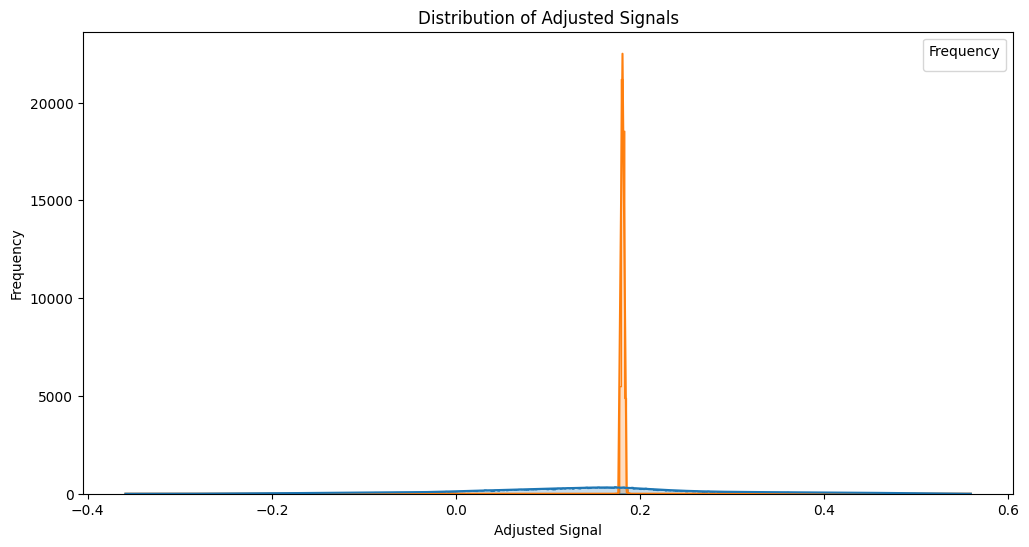

In [5]:
# Plot histograms
plt.figure(figsize=(12, 6))

sns.histplot(data=all_data, x='Adjusted_Signal', hue='Frequency', kde=True, bins=500, element='step')

plt.title('Distribution of Adjusted Signals')
plt.xlabel('Adjusted Signal')
plt.ylabel('Frequency')
plt.legend(title='Frequency')
plt.show()


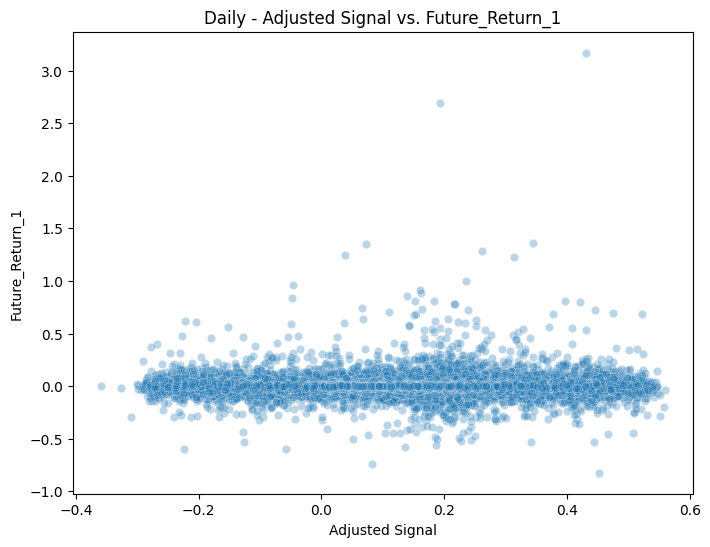

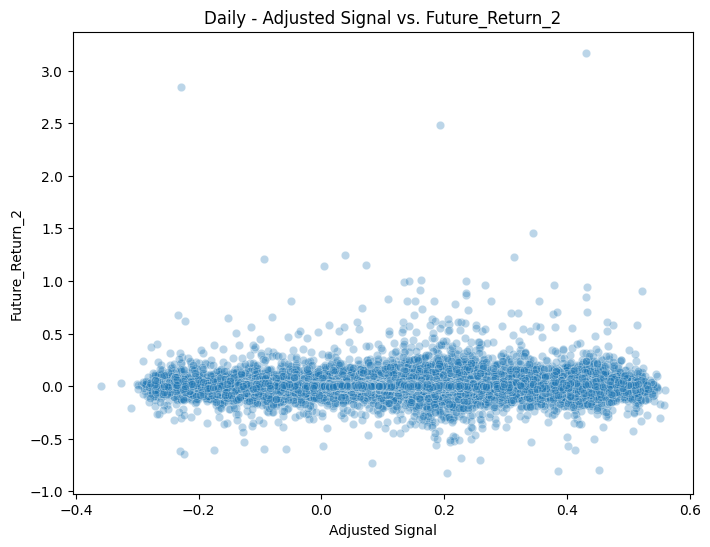

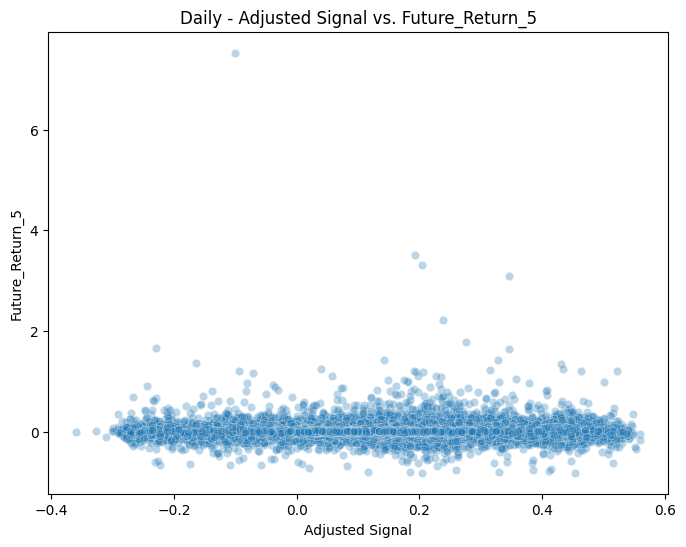

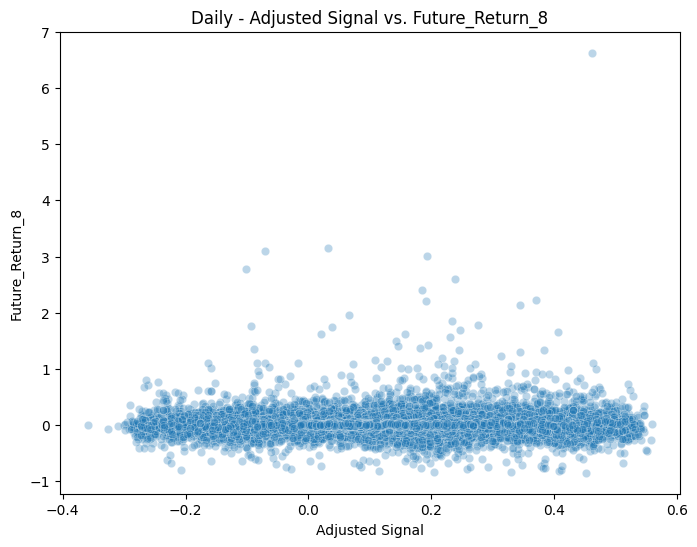

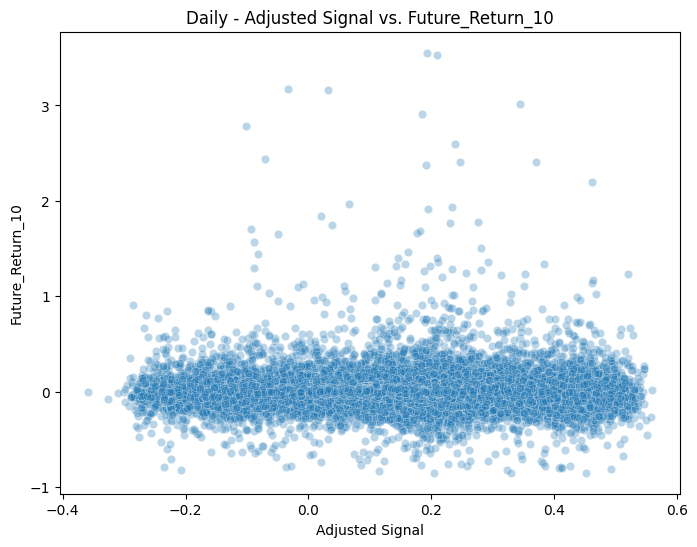

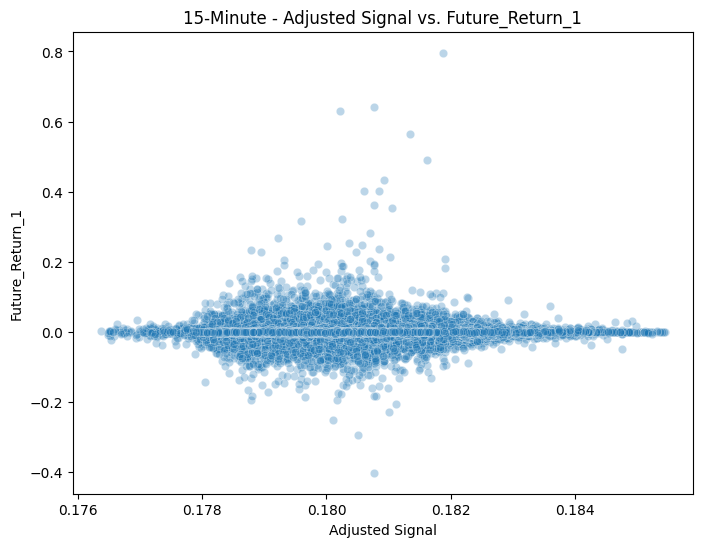

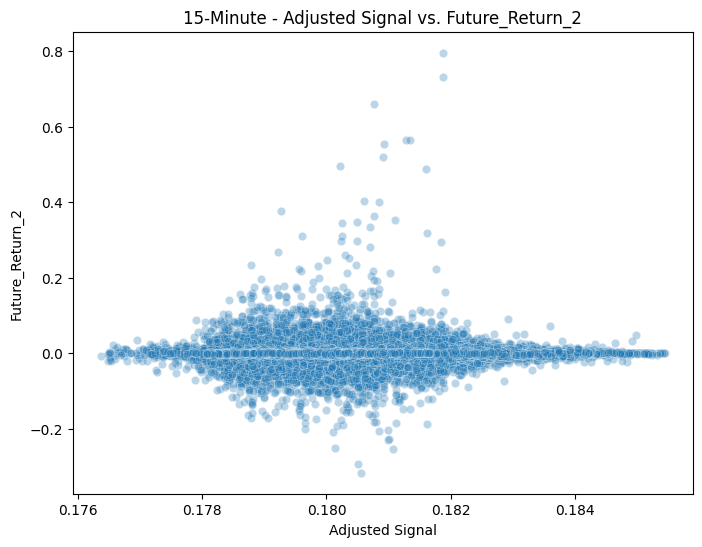

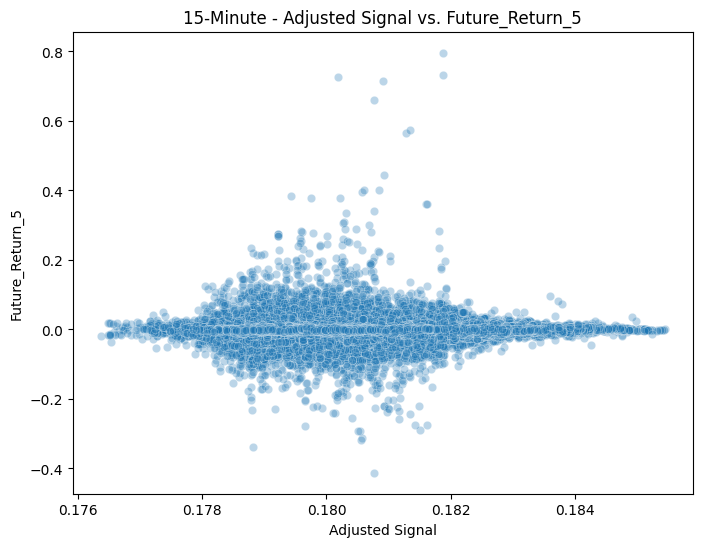

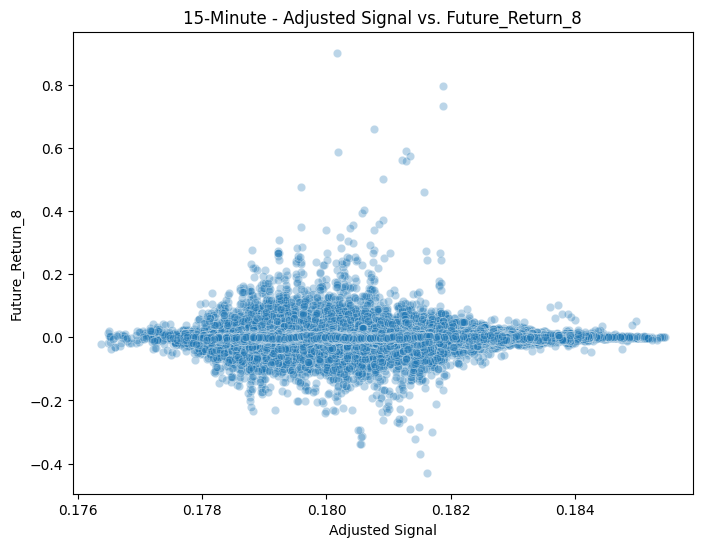

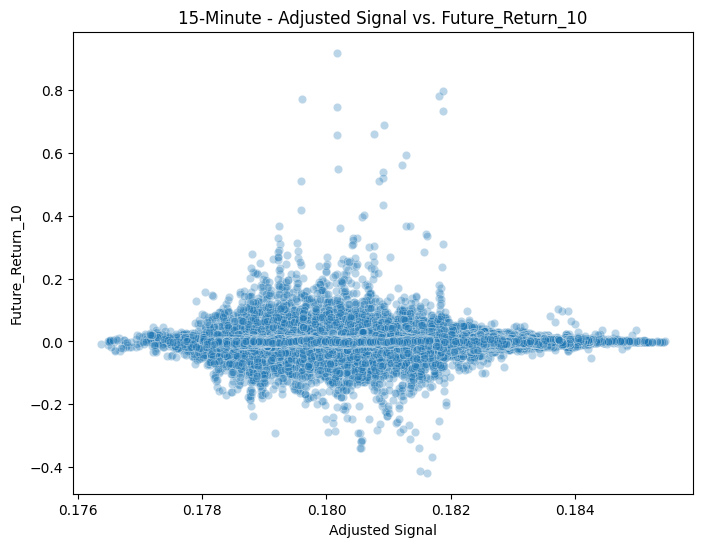

In [7]:
# Define future return columns
future_return_cols = [col for col in daily_data.columns if 'Future_Return_' in col]

# Plot for each frequency and future return gap
for freq_data, freq_name in zip([daily_data, minute_data], ['Daily', '15-Minute']):
    for future_return in future_return_cols:
        plt.figure(figsize=(8, 6))
        sns.scatterplot(data=freq_data, x='Adjusted_Signal', y=future_return, alpha=0.3)
        plt.title(f'{freq_name} - Adjusted Signal vs. {future_return}')
        plt.xlabel('Adjusted Signal')
        plt.ylabel(future_return)
        plt.show()


In [8]:
def compute_correlations(data, frequency):
    correlations = []
    future_return_cols = [col for col in data.columns if 'Future_Return_' in col]
    for future_return in future_return_cols:
        # Drop NaN values
        df = data[['Adjusted_Signal', future_return]].dropna()
        if not df.empty:
            pearson_corr, pearson_p = pearsonr(df['Adjusted_Signal'], df[future_return])
            spearman_corr, spearman_p = spearmanr(df['Adjusted_Signal'], df[future_return])
            correlations.append({
                'Frequency': frequency,
                'Future_Return': future_return,
                'Pearson_Correlation': pearson_corr,
                'Pearson_p_value': pearson_p,
                'Spearman_Correlation': spearman_corr,
                'Spearman_p_value': spearman_p
            })
    return pd.DataFrame(correlations)

# Compute correlations for each frequency
daily_corr = compute_correlations(daily_data, 'Daily')
minute_corr = compute_correlations(minute_data, '15-Minute')

# Combine results
correlation_results = pd.concat([daily_corr, minute_corr], ignore_index=True)
display(correlation_results)


,Frequency,Future_Return,Pearson_Correlation,Pearson_p_value,Spearman_Correlation,Spearman_p_value
0,Daily,Future_Return_1,0.007083,0.112864,0.011380,0.010861
1,Daily,Future_Return_2,0.010286,0.021320,0.011474,0.010222
2,Daily,Future_Return_5,0.003053,0.494410,-0.001814,0.684786
3,Daily,Future_Return_8,-0.001172,0.793014,-0.016156,0.000299
4,Daily,Future_Return_10,-0.001037,0.816389,-0.006521,0.144435
5,15-Minute,Future_Return_1,-0.000798,0.857682,0.004118,0.354979
6,15-Minute,Future_Return_2,0.002240,0.614926,0.006444,0.147841
7,15-Minute,Future_Return_5,0.000833,0.851649,0.006241,0.161163
8,15-Minute,Future_Return_8,-0.000087,0.984445,0.005464,0.220027
9,15-Minute,Future_Return_10,-0.002527,0.570536,0.002786,0.531844


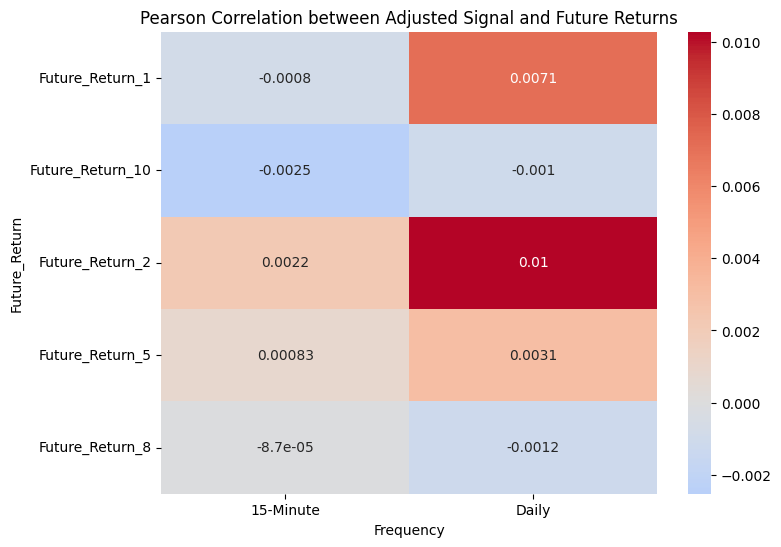

In [9]:

# Pivot the data for heatmap
corr_pivot = correlation_results.pivot(index='Future_Return', columns='Frequency', values='Pearson_Correlation')

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_pivot, annot=True, cmap='coolwarm', center=0)
plt.title('Pearson Correlation between Adjusted Signal and Future Returns')
plt.show()


In [12]:
def calculate_metrics(data, frequency):
    thresholds = np.linspace(-1, 1, 21)  # Adjust as needed
    future_return_cols = [col for col in data.columns if 'Future_Return_' in col]
    metrics = []
    for threshold in thresholds:
        for future_return in future_return_cols:
            df = data[['Adjusted_Signal', future_return]].dropna()
            # Signals above the threshold
            df_signal = df[df['Adjusted_Signal'] >= threshold]
            if not df_signal.empty:
                avg_return = df_signal[future_return].mean()
                hit_rate = (df_signal[future_return] > 0).mean()
                metrics.append({
                    'Frequency': frequency,
                    'Threshold': threshold,
                    'Future_Return': future_return,
                    'Average_Future_Return': avg_return,
                    'Hit_Rate': hit_rate,
                    'Count': len(df_signal)
                })
    return pd.DataFrame(metrics)

# Calculate metrics for each frequency
daily_metrics = calculate_metrics(daily_data, 'Daily')
minute_metrics = calculate_metrics(minute_data, '15-Minute')

# Combine results
metrics_results = pd.concat([daily_metrics, minute_metrics], ignore_index=True)
display(metrics_results.head())


,Frequency,Threshold,Future_Return,Average_Future_Return,Hit_Rate,Count
0,Daily,-1.0,Future_Return_1,0.000665,0.495080,50099
1,Daily,-1.0,Future_Return_2,0.001741,0.506677,50099
2,Daily,-1.0,Future_Return_5,0.001990,0.506098,50099
3,Daily,-1.0,Future_Return_8,0.001929,0.506208,50098
4,Daily,-1.0,Future_Return_10,0.003217,0.516707,50098


In [20]:
metrics_results

,Frequency,Threshold,Future_Return,Average_Future_Return,Hit_Rate,Count
0,Daily,-1.0,Future_Return_1,0.000665,0.495080,50099
1,Daily,-1.0,Future_Return_2,0.001741,0.506677,50099
2,Daily,-1.0,Future_Return_5,0.001990,0.506098,50099
3,Daily,-1.0,Future_Return_8,0.001929,0.506208,50098
4,Daily,-1.0,Future_Return_10,0.003217,0.516707,50098
...,...,...,...,...,...,...
135,15-Minute,0.1,Future_Return_1,0.000095,0.452942,50448
136,15-Minute,0.1,Future_Return_2,0.000020,0.466920,50439
137,15-Minute,0.1,Future_Return_5,-0.000166,0.481532,50412
138,15-Minute,0.1,Future_Return_8,-0.000218,0.488102,50387


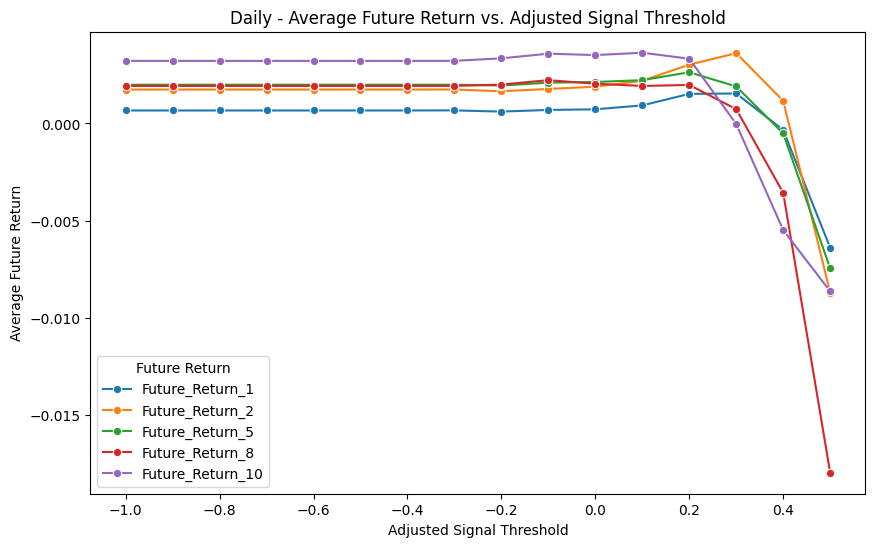

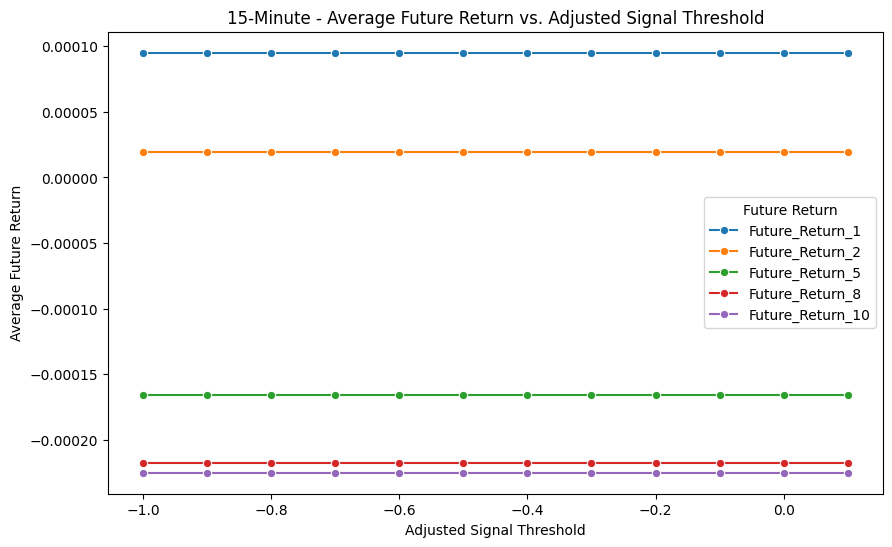

In [14]:
# Plot for each frequency and future return gap
for freq in metrics_results['Frequency'].unique():
    freq_data = metrics_results[metrics_results['Frequency'] == freq]
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=freq_data, x='Threshold', y='Average_Future_Return', hue='Future_Return', marker='o')
    plt.title(f'{freq} - Average Future Return vs. Adjusted Signal Threshold')
    plt.xlabel('Adjusted Signal Threshold')
    plt.ylabel('Average Future Return')
    plt.legend(title='Future Return')
    plt.show()


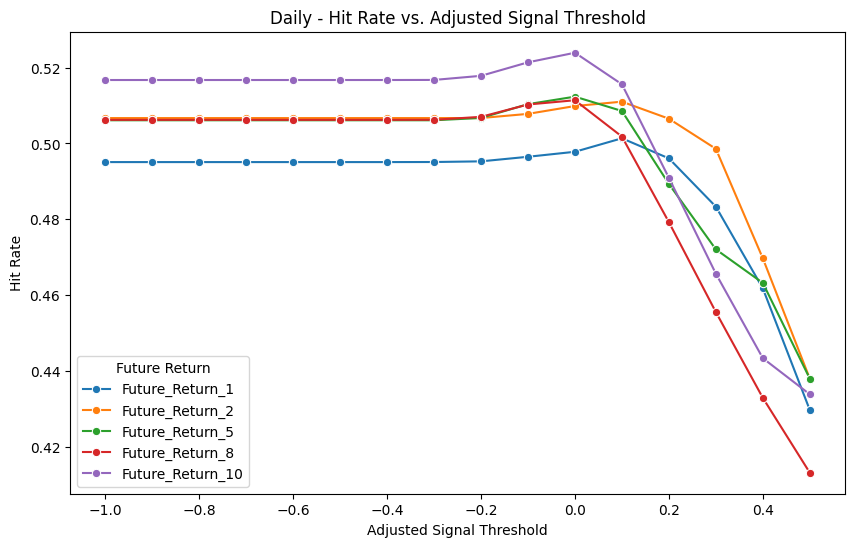

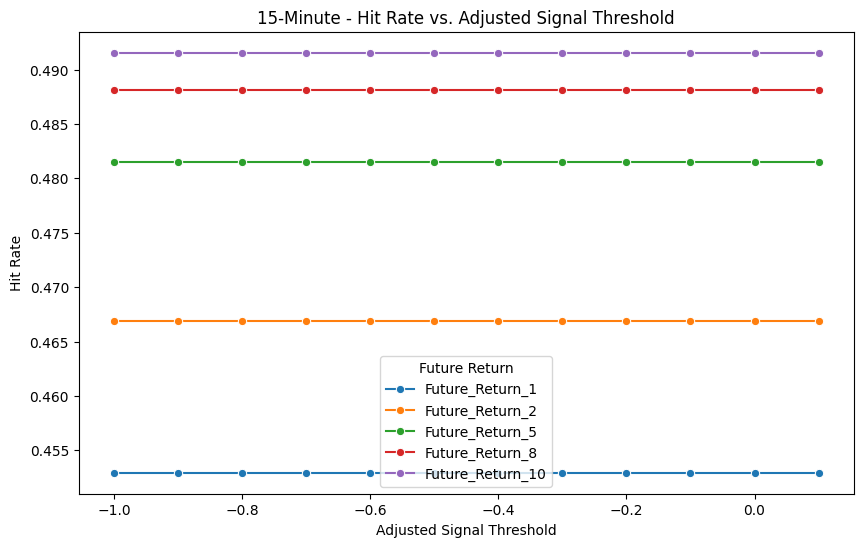

In [15]:
# Plot for each frequency and future return gap
for freq in metrics_results['Frequency'].unique():
    freq_data = metrics_results[metrics_results['Frequency'] == freq]
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=freq_data, x='Threshold', y='Hit_Rate', hue='Future_Return', marker='o')
    plt.title(f'{freq} - Hit Rate vs. Adjusted Signal Threshold')
    plt.xlabel('Adjusted Signal Threshold')
    plt.ylabel('Hit Rate')
    plt.legend(title='Future Return')
    plt.show()
